# Business questions formulation
1. How looks the typical guest using AirBnB services? Is it foreigner or countryman? Will data reveal a clear segment in which landlords could specialize?
2. Is Airbnb used primary as home sharing with tourists? Or as a business where entire flats are dedicated to tourists disturbing local housing market?


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import datetime
%matplotlib inline
import gender_guesser.detector as gender

# Gathering necessary data

Based on my personal interrest the following cities were selected:
- Prague
- Munich
- ~~Zurich~~ (Zurich data were temporary unavailable)
- Geneva 
- San Francisco

To answer the questions above I've choosen [Data Published on InsideAirBnB](http://insideairbnb.com/get-the-data.html)

In [2]:
class City:
    data_selection_done = False # Indicate whether redundant columns were already removed
    data_cleaning_done = False # Indicate whether data were already cleaned
    
    monthly_avaibility = None # monthly average of properties avaibility
    monthly_price = None # monthly average of rental prices
    monthly_price_min = None
    monthly_price_max = None
    monthly_avaibility_min = None
    monthly_avaibility_max = None
    
    data_timeframe = None # Range of dataset (e.g. "2019 November - 2020 December")
    
    # objects holding datasets
    listings = None
    calendar = None
    reviews = None
    
    def __init__(self, name, data_folder):
        self.name = name
        self.data_folder = data_folder      
    
    def load_listings(self):
        self.listings = pd.read_csv(self.data_folder + "/listings.csv", low_memory=False)
        
    def release_listings(self):
        del self.listings   
   
    def load_reviews(self):
        self.reviews = pd.read_csv(self.data_folder + "/reviews.csv")
        
    def release_reviews(self):
        del self.reviews

In [3]:
#Initialize cities
prague = City("Prague", "../Dataset/Prague")
munich = City("Munich", "../Dataset/Munich")
geneva = City("Geneva", "../Dataset/Geneva")
san_francisco = City("San Francisco", "../Dataset/San Francisco")

cities_list = [prague, munich, san_francisco, geneva]

In [4]:
def get_rows_cols(df):
    '''
        Print number of rows and columns in a provided dataset
        
        Parameters:
        arg1 (pandas_dataframe): Dataframe for which number of rows and columns is printed
        
        Returns:
        Nothing
    '''
    
    rows = df.shape[0] #Provide the number of rows in the dataset
    cols = df.shape[1] #Provide the number of columns in the dataset
    
    return rows, cols

def explore_data(df, df_name):
    ''' Prints number of rows and columns in a provided dataset
        
        Parameters:
        Nothing
        
        Returns:
        Nothing
    '''
    
    rows, cols = get_rows_cols(df)
    print ("The dataset \'{0}\' has: {1} rows and {2} columns".format(df_name, rows, cols))

# Chapter to get Answer to Question 1
1. How looks the typical guest using AirBnB services? Is it foreigner or countryman? Will data reveal a clear segment in which landlords could specialize?

Here I intended to use unsupervised machine learning to identify guests segments as I did in [this project](https://github.com/JMarcan/unsupervised_learning_customer_segments). However, the only data available about guests seems to be their name in 'reviews.csv'. 

Therefore, the only thing we can find out is whether guests writing reviews are in majority men or women. 

When singer from my hometown Jaromir Nohavica openened his cabaret club, he mentioned that "The secret is to make this place nice for women. When the place is nice for women, they will brings men with them.". Let's check whether its applicable even here.

As training my machine learning model for this task would be an overkill,
I decided to use avaible python library [gender_guesser](https://pypi.org/project/gender-guesser/) that can predict whether a provided name is male or female.

## Steps to get answer to the question 1

In [5]:
def explore_reviews_dataset(city):
    ''' Print columns names for dataset reviews for a given city
        
        Args:
            city (City): instance of object City
            
        Returns:
            None
    '''
    print("- Explore dataset for city \'{0}\'".format(city.name))
    print(city.reviews.columns.values)

print("=== Load & Explore reviews dataset ===") 
for city in cities_list:
    city.load_reviews()
    
    explore_reviews_dataset(city)
    explore_data(city.reviews, "reviews")

=== Load & Explore reviews dataset ===
- Explore dataset for city 'Prague'
['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
The dataset 'reviews' has: 683884 rows and 6 columns
- Explore dataset for city 'Munich'
['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
The dataset 'reviews' has: 175562 rows and 6 columns
- Explore dataset for city 'San Francisco'
['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
The dataset 'reviews' has: 382156 rows and 6 columns
- Explore dataset for city 'Geneva'
['listing_id' 'id' 'date' 'reviewer_id' 'reviewer_name' 'comments']
The dataset 'reviews' has: 68163 rows and 6 columns


In [6]:
d = gender.Detector()

def get_statistics_row(city):
    ''' Get row with gender statistics for a given city
        
        Args:
            city (City): instance of object City
            
        Returns:
            df1 (pd.DataFrame): row with gender statistics for a given city
    '''
    print("- Reading statistics for city {0}".format(city.name))

    city.reviews['gender'] = city.reviews['reviewer_name'].map(lambda x: d.get_gender(x))

    total_count = city.reviews['gender'].shape[0]
    males_count= (city.reviews['gender'] == 'male').sum()
    females_count = (city.reviews['gender'] == 'female').sum()
    unknown_count =  total_count - (males_count + females_count)

    males_perc = (100*males_count/total_count)
    females_perc = (100*females_count/total_count)
    unknown_perc = (100*unknown_count/total_count)

    df1 = pd.DataFrame({'city': [city.name], 
                    'male_%': [males_perc],
                    'female_%': [females_perc],
                    'unknown_%': [unknown_perc],
                    'count_of_records': [total_count]
                   })
    return df1

table_gender = pd.DataFrame(columns = ['city', 'male_%', 'female_%', 'unknown_%', 'count_of_records'])

print("=== Load gender distribution statistics ===") 
for city in cities_list:
    df1 = get_statistics_row(city)
    table_gender = table_gender.append(df1)

display(table_gender)

=== Load gender distribution statistics ===
- Reading statistics for city Prague
- Reading statistics for city Munich
- Reading statistics for city San Francisco
- Reading statistics for city Geneva


,city,male_%,female_%,unknown_%,count_of_records
0,Prague,38.165244,37.377830,24.456925,683884
0,Munich,41.412720,35.314590,23.272690,175562
0,San Francisco,38.868420,37.892379,23.239201,382156
0,Geneva,38.629462,36.549154,24.821384,68163


## Answer to the question 1
You can see that the library identified in each city gender for more than 75% of inputs.

The table does not show significant difference between ratio of males and females writing reviews.
Maximum deviation of 6% has Munich where 41% of authors were identified as males and 35% as females. Taking into consideration unknown gender for authors of 23% reviews for Munich, we will assume that the ratio is close to 50:50 as is case for other cities.

Seems the Wisdom "The secret is to make this place nice for women." is not applicable here. If host wants to have good reviews, he needs to take care about both genders equally. Which he should do anyway.

In [7]:
# Release already analyzed dataset from the memory
for city in cities_list:
    print(" - Release reviews dataset for city \'{0}\' from the memory".format(city.name))
    city.release_reviews()

 - Release reviews dataset for city 'Prague' from the memory
 - Release reviews dataset for city 'Munich' from the memory
 - Release reviews dataset for city 'San Francisco' from the memory
 - Release reviews dataset for city 'Geneva' from the memory


# Chapter to get Answer to Question 2
2. Is Airbnb used primary as home sharing with tourists? Or as a business where entire flats are dedicated to tourists disturbing local housing market?

## Steps to get answer to the question 2

In [8]:
print(" === Load & explore \'listings\' dataset ===")
for city in cities_list:
    city.load_listings()
    
    print("- For city \'{0}\'".format(city.name))
    explore_data(city.listings, "listings")

 === Load & explore 'listings' dataset ===
- For city 'Prague'
The dataset 'listings' has: 14184 rows and 106 columns
- For city 'Munich'
The dataset 'listings' has: 11481 rows and 106 columns
- For city 'San Francisco'
The dataset 'listings' has: 8533 rows and 106 columns
- For city 'Geneva'
The dataset 'listings' has: 3271 rows and 106 columns


In [9]:
def select_relevant_data(city):
    ''' Selects relevant data from the whole dataset
        
        Args:
            city (City): instance of object City
            
        Returns:
            df1 (pd.DataFrame): row
    '''
    
    if city.data_selection_done == True: # Avoid removing columns that were already removed
        print("City \'{0}\': Relevant columns were already removed".format(city.name))
        return
    
    print("= Selecting data for city {0} =".format(city.name))

    # Select only apartments for our analysis
    city.listings = city.listings[(city.listings['property_type'] == 'Apartment')]
    
    city.data_selection_done = True

for city in cities_list:
    select_relevant_data(city)

= Selecting data for city Prague =
= Selecting data for city Munich =
= Selecting data for city San Francisco =
= Selecting data for city Geneva =


In [10]:
# show avaible values for room_type
print(prague.listings.room_type.unique())

['Entire home/apt' 'Private room' 'Shared room']


In [11]:
def analyze_accomodation_type(city):
    ''' Get row with accomodation type statistics for a given city
        
        Args:
            city (City): instance of object City
            
        Returns:
            df1 (pd.DataFrame): row with accomodation type statistics for a given city
    '''
    total_count = city.listings.shape[0]
    entire_home_count = (city.listings['room_type'] == 'Entire home/apt').sum()
    private_room_count = (city.listings['room_type'] == 'Private room').sum()
    shared_room_count = (city.listings['room_type'] == 'Shared room').sum()
    
    entire_home_perc = (100*entire_home_count/total_count)
    private_room_perc = (100*private_room_count/total_count)
    shared_room_perc = (100*shared_room_count/total_count)
    
    df1 = pd.DataFrame({'city': [city.name], 
                    'count_of_entire_homes': [entire_home_count],
                    'entire_home_%': [entire_home_perc],
                    'private_room_%': [private_room_perc],
                    'shared_room_%': [shared_room_perc],
                    'count_of_records': [total_count]})
    return df1

table_accomodation_type = pd.DataFrame(columns = ['city', 'count_of_entire_homes', 'entire_home_%', 'private_room_%', 'shared_room_%', 'count_of_records'])

print("=== Load accomodation type statistics ===") 
for city in cities_list:
    df1 = analyze_accomodation_type(city)
    table_accomodation_type = table_accomodation_type.append(df1)
    
table_accomodation_type.set_index("city", inplace=True) 
display(table_accomodation_type)

=== Load accomodation type statistics ===


,count_of_entire_homes,entire_home_%,private_room_%,shared_room_%,count_of_records
city,,,,,
Prague,9947,83.997636,15.208580,0.793785,11842
Munich,5811,57.947746,40.616274,1.435979,10028
San Francisco,2522,72.763993,24.120023,3.115984,3466
Geneva,1875,69.162671,29.915160,0.922169,2711


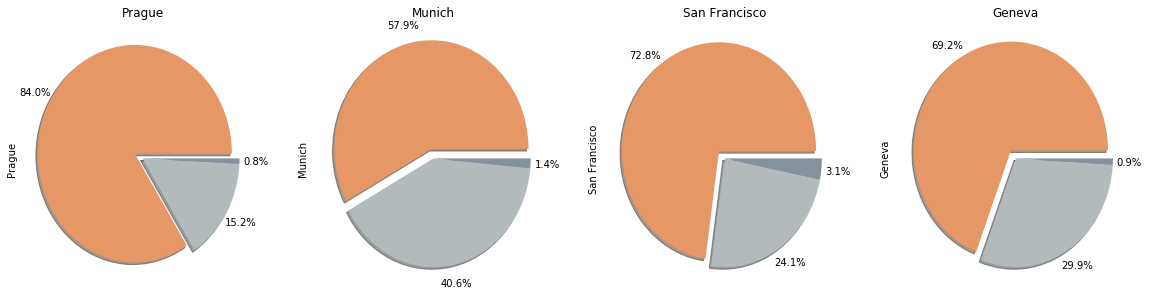

In [12]:
# visualize results in pie-chart
colors = ['#e59866', '#b2babb', '#85929e']
explode = (0.09, 0, 0) 

transpose = table_accomodation_type.drop(columns=['count_of_entire_homes', 'count_of_records']).transpose()


p = transpose.plot(kind='pie', subplots=True, 
                   figsize=(20, 5), explode=explode, colors=colors, autopct='%1.1f%%', 
                   shadow=True, title = ['Prague', 'Munich', 'San Francisco', 'Geneva'], 
                   pctdistance=1.17, legend=False, labels=None)

- Brown in the pie chart is % of entire homes beeing rented on AirBnB
- Light green is % of private rooms
- Dark green is % of shared rooms

## Answer to the question 2

From the table and charts above is clear that on Airbnb are listed mostly entire apartments.
- Good for tourists as they have many choices where to stay in place of their own.
- Not so good for local citizens thought. Houses dedicated for short term rentals are often houses not avaible for long-term rental, making housing in a city less affordable. This represents problem even for cities as they receive money based on how many people live in a given city.
- The highest number of entire flats available for rent is in Prague where were listed 9947 apartments, representing 84% of total AirBnB offering there. Seems AirBnB is becoming more professional business platform, than platform for sharing unused spaces with visitors.